House Rocket Company:

A House Rocket é uma plataforma digital que têm como modelo de negócio, a compra e a venda de imóveis utilizando dados online como critério de aquisição. O objetivo é encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

A principal estratégia é adquirir imóveis em ótimas localizações com preços baixos e atrativos para revender à preços mais altos; lucrando mais, maximizando a sua receita.

https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
#Os principais fatores que influenciam na decisão de compra de um imóvel:

# Localização
# Preço e condição de pagamento
# Metragem
# Acabamento
# Vagas de garagem
# Opções de lazer

# Aula - 01:

Solicitações do CEO:

Quantas casas estão disponíveis para compra?

Quantos atributos as casas possuem?

Quais são os atributos das casas?

Qual a casa mais cara ( casa com o maior valor de venda )?

Qual a casa com o maior número de quartos?

Qual a soma total de quartos do conjunto de dados?

Quantas casas possuem 2 banheiros?

Qual o preço médio de todas as casas no conjunto de dados?

Qual o preço médio de casas com 2 banheiros?

Qual o preço mínimo entre as casas com 3 quartos?

Quantas casas possuem mais de 300 metros quadrados na sala de estar?

Quantas casas tem mais de 2 andares?

Quantas casas tem vista para o mar?

Das casas com vista para o mar, quantas tem 3 quartos?

Das casas com mais de 300 metros quadrados de sala de estar, quantas tem mais de 2 banheiros?

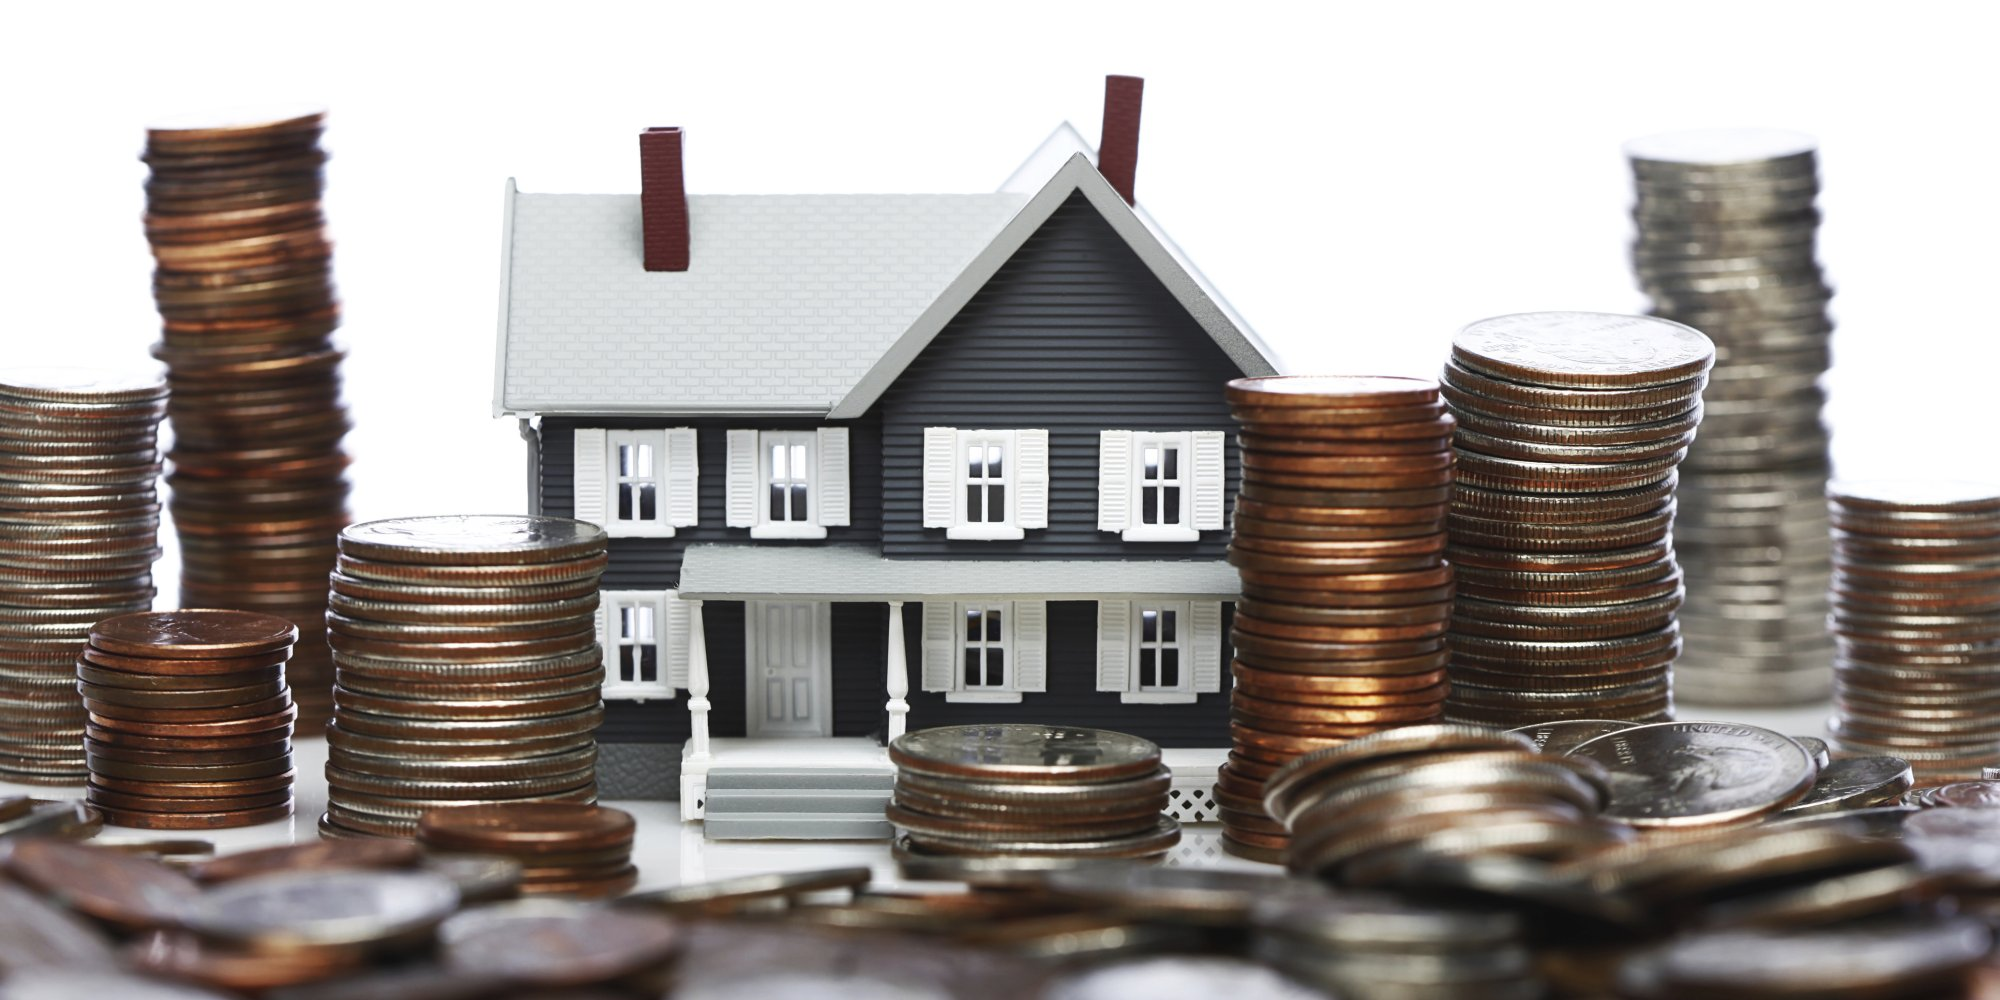

In [4]:
from IPython.display import Image
Image(filename='dataset-original.jpg')

# Imports:

In [8]:
!pip install pandas

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [10]:
df = pd.read_csv('kc_house_data.csv')

In [11]:
# Verificação do topo do arquivo:

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180.000,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170.000,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770.000,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050.000,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680.000,0,1987,0,98074,47.617,-122.045,1800,7503


In [12]:
# Verificação da base do arquivo:

df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,...,8,1530.000,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,...,8,2310.000,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,...,7,1020.000,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,...,8,1600.000,0,2004,0,98027,47.535,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.000,2,0.750,1020,1076,2.000,0,0,...,7,1020.000,0,2008,0,98144,47.594,-122.299,1020,1357


In [13]:
# Verificação do tipo de variáveis temos nas colunas:
# (object, int64, float64)

df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
# Verificação se NAN 
 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
# 1. Quantas casas estão disponíveis para compra?
# 21613

df.shape

(21613, 21)

In [16]:
# 2. Quantos atributos as casas possuem?
#21

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
# 3. Quais são os atributos das casas?
#['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       #'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       #'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       #'lat', 'long', 'sqft_living15', 'sqft_lot15']
    
    
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
# 4. Qual a casa mais cara ( casa com o maior valor de venda )?
#7552 , id: 762700020

df.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.000,6,8.000,12050,27600,2.500,0,3,...,13,8570.000,3480,1910,1987,98102,47.630,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.000,5,4.500,10040,37325,2.000,1,2,...,11,7680.000,2360,1940,2001,98004,47.650,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.000,6,7.750,9890,31374,2.000,0,4,...,13,8860.000,1030,2001,0,98039,47.630,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.000,5,5.750,9200,35069,2.000,0,0,...,13,6200.000,3000,2001,0,98039,47.629,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.000,5,5.000,8000,23985,2.000,0,4,...,12,6720.000,1280,2009,0,98004,47.623,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.000,3,1.000,860,10426,1.000,0,0,...,6,860.000,0,1954,0,98146,47.499,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.000,2,1.000,730,9975,1.000,0,0,...,5,730.000,0,1943,0,98168,47.481,-122.315,860,9000
465,8658300340,20140523T000000,80000.000,1,0.750,430,5050,1.000,0,0,...,4,430.000,0,1912,0,98014,47.650,-121.909,1200,7500
15293,40000362,20140506T000000,78000.000,2,1.000,780,16344,1.000,0,0,...,5,780.000,0,1942,0,98168,47.474,-122.280,1700,10387


In [21]:
#5. Qual a casa com o maior número de quartos?
# 15870,	id: 2402100895, 33 bedrooms.

df.sort_values( 'bedrooms', ascending= False )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.000,33,1.750,1620,6000,1.000,0,0,...,7,1040.000,580,1947,0,98103,47.688,-122.331,1330,4700
8757,1773100755,20140821T000000,520000.000,11,3.000,3000,4960,2.000,0,0,...,7,2400.000,600,1918,1999,98106,47.556,-122.363,1420,4960
15161,5566100170,20141029T000000,650000.000,10,2.000,3610,11914,2.000,0,0,...,7,3010.000,600,1958,0,98006,47.571,-122.175,2040,11914
13314,627300145,20140814T000000,1148000.000,10,5.250,4590,10920,1.000,0,2,...,9,2500.000,2090,2008,0,98004,47.586,-122.113,2730,10400
19254,8812401450,20141229T000000,660000.000,10,3.000,2920,3745,2.000,0,0,...,7,1860.000,1060,1913,0,98105,47.663,-122.320,1810,3745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,3980300371,20140926T000000,142000.000,0,0.000,290,20875,1.000,0,0,...,1,290.000,0,1963,0,98024,47.531,-121.888,1620,22850
8484,2310060040,20140925T000000,240000.000,0,2.500,1810,5669,2.000,0,0,...,7,1810.000,0,2003,0,98038,47.349,-122.053,1810,5685
875,6306400140,20140612T000000,1095000.000,0,0.000,3064,4764,3.500,0,2,...,7,3064.000,0,1990,0,98102,47.636,-122.322,2360,4000
8477,2569500210,20141117T000000,339950.000,0,2.500,2290,8319,2.000,0,0,...,8,2290.000,0,1985,0,98042,47.347,-122.151,2500,8751


In [22]:
# 6. Qual a soma total de quartos do conjunto de dados?

df['bedrooms'].sum()

72854

In [23]:
# 7. Quantas casas possuem 2 banheiros?

df[df['bathrooms']== 2].shape 

(1930, 21)

In [24]:
# 8. Qual o preço médio de todas as casas no conjunto de dados?

df['price'].mean()

540088.1417665294

In [25]:
# 9. Qual o preço médio de casas com 2 banheiros?

df.loc[df['bathrooms'] == 2, 'price'].mean()

457889.7186528497

In [26]:
# 10. Qual o preço mínimo entre as casas com 3 quartos?

df.loc[df['bedrooms'] == 3, 'price'].min() 

82000.0

In [27]:
# 11. Quantas casas possuem mais de 300 metros quadrados na sala de estar?

df['m2_living'] = df['sqft_living'] * 0.092

df[ df['m2_living' ] > 300 ].shape

(2141, 22)

In [28]:
# 12. Quantas casas tem mais de 2 andares?

df[df['floors'] == 1].shape

(10680, 22)

In [29]:
# 13. Quantas casas tem vista para o mar?

df[df['waterfront'] == 1].shape

(163, 22)

In [30]:
# 14. Das casas com vista para o mar, quantas tem 3 quartos?

df[(df['waterfront'] == 1) & (df['bedrooms'] == 3 )].shape

(64, 22)

In [31]:
# 15. Das casas com mais de 300 metros quadrados de sala de estar, quantas tem mais de 2 banheiros?

df[( df['m2_living' ] > 300 ) & (df['bathrooms'] == 2)].shape 

(17, 22)